In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("oec.csv")

In [3]:
df.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [4]:
df.describe()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,3584.000000,1313.000000,2774.000000,3485.000000,1406.000000,1108.000000,328.000000,43.000000,46.000000,665.000000,741.000000,2.000000,3574.000000,2133.000000,3416.000000,3263.000000,2509.000000,3455.000000,517.000000
mean,0.097656,2.890944,0.371190,537.248317,2.000170,0.166910,150.363823,144.200847,90.624476,82.973840,871.714170,1.502750,2013.300504,554.912346,0.983225,1.495629,0.016228,5505.514501,4.635355
std,0.424554,10.204485,0.416871,7509.660676,19.352699,0.189760,117.859945,127.865952,93.047968,21.402768,699.314463,2.117431,6.159674,847.566803,0.319063,3.071298,0.193495,1204.271777,4.657679
min,0.000000,0.000008,0.002300,0.090706,0.004420,0.000000,-233.000000,-174.640000,-5.112604,-0.000543,102.200000,0.005500,1781.000000,1.295000,0.012000,0.000014,-2.090000,540.000000,0.002200
25%,0.000000,0.150000,0.141062,4.757940,0.053000,0.020000,66.750000,37.167396,1.509500,85.058000,321.800000,0.754125,2013.000000,60.000000,0.830000,0.810000,-0.050000,5113.000000,2.000000
50%,0.000000,0.940000,0.209600,13.071630,0.169500,0.100000,139.700000,162.280000,69.821251,87.800000,719.600000,1.502750,2014.000000,333.000000,0.977000,1.000000,0.020000,5634.000000,4.000000
75%,0.000000,2.500000,0.321518,49.514000,1.250000,0.247282,243.000000,252.625834,169.175000,89.140000,1310.900000,2.251375,2016.000000,773.130000,1.105000,1.250000,0.100000,5940.000000,6.300000
max,3.000000,263.000000,6.000000,320000.000000,662.000000,0.956000,791.000000,339.300000,320.800000,305.000000,7112.000000,3.000000,2017.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000,80.000000


In [5]:
df.isna().mean().sort_values(ascending=False).head(15)


AgeGyr                  0.999442
LongitudeDeg            0.988002
AscendingNodeDeg        0.987165
PeriastronDeg           0.908482
HostStarAgeGyr          0.855748
InclinationDeg          0.814453
SurfaceTempK            0.793248
Eccentricity            0.690848
PlanetaryMassJpt        0.633650
SemiMajorAxisAU         0.607701
DistFromSunParsec       0.404855
HostStarMetallicity     0.299944
RadiusJpt               0.226004
HostStarRadiusSlrRad    0.089565
HostStarMassSlrMass     0.046875
dtype: float64

In [6]:

df=df.dropna(subset=['PlanetaryMassJpt', 'RadiusJpt','SemiMajorAxisAU'])


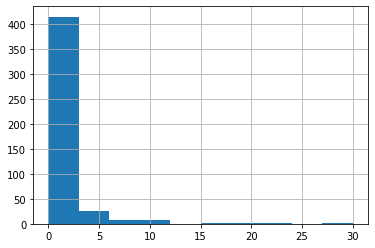

In [7]:
df["PlanetaryMassJpt"].hist()

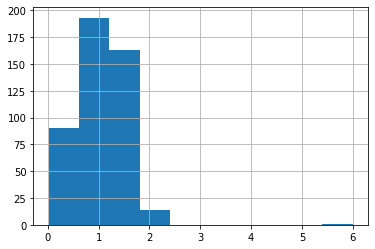

In [8]:
df["RadiusJpt"].hist()

### Highly skewed data for mass radius etc

In [9]:
%matplotlib inline

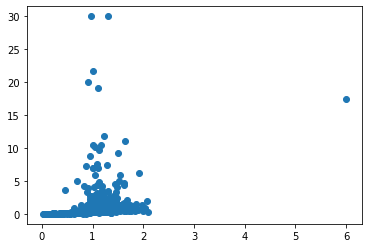

In [10]:
plt.scatter(df["RadiusJpt"],df["PlanetaryMassJpt"])

## Removing outliers to get a good scatter plot

In [11]:
df["RadiusJpt"].quantile(0.999)

4.1991000000003025

Removing outliers with values more than the 99.9th percentile we get an approximately polynomial graph between radius and mass as expected

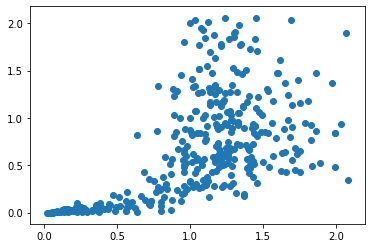

In [12]:
dfremoved=df[df["RadiusJpt"]<df["RadiusJpt"].quantile(0.999)]
dfremoved=dfremoved[dfremoved["PlanetaryMassJpt"]<dfremoved["RadiusJpt"].quantile(0.999)]
plt.scatter(dfremoved["RadiusJpt"],dfremoved["PlanetaryMassJpt"])

# df=df[df["RadiusJpt"]<1.32]
# df=df[df["PlanetaryMassJpt"]<1.47]

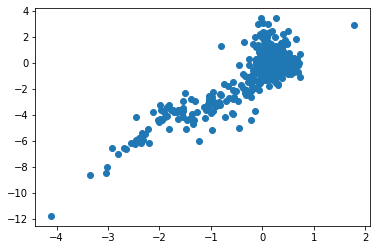

In [13]:
df["PlanetaryMassJptlog"]=df["PlanetaryMassJpt"].apply(np.log)
df["RadiusJptlog"]=df["RadiusJpt"].apply(np.log)
df["SemiMajorAxisAUlog"]=df["SemiMajorAxisAU"].apply(np.log)
plt.scatter(df["RadiusJptlog"],df["PlanetaryMassJptlog"])

In [14]:
df.describe()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,...,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,PlanetaryMassJptlog,RadiusJptlog,SemiMajorAxisAUlog
count,461.000000,461.000000,461.000000,454.000000,461.000000,322.000000,58.000000,14.000000,26.000000,430.000000,...,455.000000,386.000000,453.000000,445.000000,407.000000,451.000000,206.000000,461.000000,461.000000,461.000000
mean,0.151844,1.535009,1.050761,1235.735000,2.279343,0.071214,132.346373,145.961191,74.396765,84.106710,...,2011.131868,489.801772,1.077680,1.251821,0.066506,5785.782705,4.525839,-0.798987,-0.157986,-2.663618
std,0.517878,3.081411,0.519615,10450.644806,31.257136,0.137412,141.022131,124.643173,72.531298,15.123550,...,14.210507,601.823319,0.295952,0.584473,0.191883,1682.951586,3.142521,2.055339,0.799159,1.351010
min,0.000000,0.000008,0.016438,0.176891,0.004800,0.000000,-178.590000,-4.568132,-5.112604,-0.000543,...,1781.000000,6.546000,0.080000,0.089000,-0.640000,2205.000000,0.002650,-11.766768,-4.108166,-5.339139
25%,0.000000,0.260000,0.832944,2.777413,0.038660,0.000000,65.125000,38.270022,1.509500,85.044500,...,2010.000000,184.750000,0.938000,0.944000,-0.020000,5449.500000,2.212500,-1.347074,-0.182789,-3.252950
50%,0.000000,0.760000,1.123000,3.787708,0.048800,0.010900,122.630000,117.383458,63.285000,87.125000,...,2012.000000,330.000000,1.078000,1.130000,0.070000,5778.000000,4.200000,-0.274437,0.116004,-3.020025
75%,0.000000,1.470000,1.339000,7.919539,0.077500,0.077750,178.140000,248.930088,112.805410,88.707500,...,2015.000000,613.202790,1.240000,1.497000,0.200000,6105.000000,6.200000,0.385262,0.291923,-2.557477
max,2.000000,30.000000,6.000000,166510.000000,662.000000,0.933690,791.000000,339.300000,270.000000,138.200000,...,2017.000000,8500.000000,2.820000,6.300000,0.440000,27730.000000,13.900000,3.401197,1.791759,6.495266


In [15]:
linearRegressor = LinearRegression()

In [16]:
xTrain=df[["RadiusJptlog"]]
yTrain=df["PlanetaryMassJptlog"]

In [17]:
linearRegressor.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

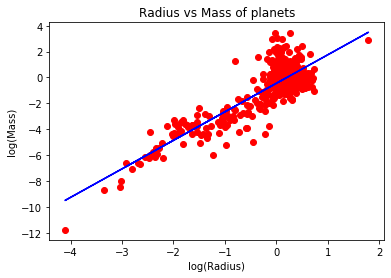

In [18]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plt.title('Radius vs Mass of planets')
plt.xlabel('log(Radius)')
plt.ylabel('log(Mass)')
plt.show()

Correlation coefficient

In [19]:
linearRegressor.score(xTrain,yTrain)

0.7340796104771484

In [20]:
linearRegressor.coef_

array([2.20354528])

In [21]:
linearRegressor.intercept_

-0.450858304370371

In [22]:
linearRegressor.predict(np.array([[0],[1]]))

array([-0.4508583 ,  1.75268698])

log(Mass)=2.2*log(Radius)-0.45

Predicted : Mass=0.637*Radius^2.2
Actual : Mass=c*Radius^3

In [23]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [24]:
X=np.array(df[["RadiusJptlog","PlanetaryMassJptlog"]])
X=X.reshape(-1,2)

In [25]:
km.fit(X)
y_km = km.fit_predict(X)
y_km

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

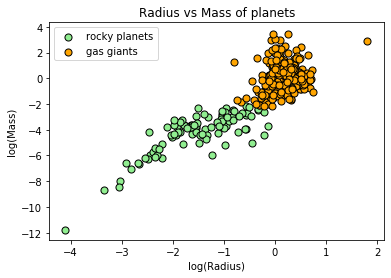

In [26]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='rocky planets'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='gas giants'
)
plt.title('Radius vs Mass of planets')
plt.xlabel('log(Radius)')
plt.ylabel('log(Mass)')

plt.legend(scatterpoints=1)
plt.show()

In [27]:
df["cluster"]=y_km

In [28]:
df["MassRadiusLogRatio"]=df["PlanetaryMassJptlog"]/df["RadiusJptlog"]

In [29]:
df.groupby("cluster").agg({"MassRadiusLogRatio":"mean"})

,MassRadiusLogRatio
cluster,
0,3.656445
1,NaN


In [39]:
df["MassRadiusCubeRatio"]=df["PlanetaryMassJpt"]/df["RadiusJpt"]**3

In [40]:
df.groupby("cluster").agg({"MassRadiusCubeRatio":"mean"})

,MassRadiusCubeRatio
cluster,
0,2.943103
1,1.433324


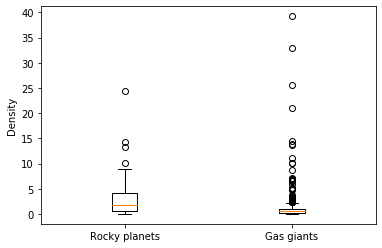

In [41]:
plt.boxplot([df[df["cluster"]==0]["MassRadiusCubeRatio"],df[df["cluster"]==1]["MassRadiusCubeRatio"]])
positions = (1, 2)
labels = ("Rocky planets", "Gas giants")
plt.ylabel('Density')
plt.xticks(positions, labels)
plt.show()